<h1 style="text-align:center">
    Estadísticas de Accidentes en Madrid
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Christopher Rodriguez Principe
</h3>
    
<h3 style="text-align:center">
    01/27/2022
   
</h3>

<hr>

## Introducción

<font color="darkblue"> En este proyecto se desarrolla en Python un análisis básico de datos sobre accidentes de tráfico de la Comunidad de Madrid. Los datos provienen de datos.madrid.es de un csv, en Python, a partir de he realizadode archivo contiene mi proyecto de Programación en Python. He resuelto las dificultades que he encontrado a mi mejor capacidad y encontre muy oportuno esta asignación. Estoy seguro que con la practica y el esfuerzo a traves del tiempo podre perfeccionar los retos presentados en este proyecto. 

## a) Algunas operaciones sencillas [2 puntos]

Vamos a trabajar con una tabla del INE que contiene información sobre el paro en España. Abriendo el archivo, vemos algo así:

<center>
    <img src="./images/tabla_1.png" width="800">
</center>

Si miramos una línea de esta tabla (salvo la primera, que es la cabecera), encontamos lo siguiente:
    
<table>
  <tr>
    <th>2020S000073</th>
    <th>01/01/2020</th>
    <th>18:48</th>
    <th>AVDA. PIO XII</th>
    <th>81</th>
    <th>CHAMARTÍN</th>
    <th>Atropello a persona</th>
    <th>Despejado</th>
    <th>Turismo</th>
    <th>Conductor</th>
    <th>DE 55 A 59 AÑOS</th>
    <th>Hombre</th>
    <th>14</th>
    <th> </th>
  </tr>
</table>

Pero si inspeccionamos el archivo con un editor de texto, vemos que esa línea es como sigue:

    2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Una cadena de caracteres. Hagamos en Python algunas operaciones básicas con los algunos de los datos anteriores y con la cadena en sí.

**a.1 Redondeo de la hora**

La primera operación consiste en redondear una hora, simplemente despreciando los minutos y dando lugar al entero correspondiente, entre 0 y 23. 

In [1]:
# Esta celda debe ser completada por el estudiante

def redondeo_hora(t):
    """ 
    Dado un Hora t redondear.   
    
    Parametros
    ---------
    t: int-> Hora deseada 
        
    Returns
    -------
    round:int-> selecciona los primeros valores antes de ':'.
    """
    
    return int(t.split(":")[0])
    

In [2]:
# Pruebas de funcionamiento:

print(redondeo_hora('12:48'))

12


Es bastante habitual hacer varias pruebas a la vez:

In [3]:
# Pruebas de funcionamiento:

for h in ['15:00', '23:15', '14:22']:
    print(redondeo_hora(h))

15
23
14


**a.2 Rangos de edad**

Ahora, deseamos codificar los rangos de edad, asignando a cada rango descrito un intervalo de dos enteros. El ejemplo de funcionamiento te aclarará lo que se pide exactamente: 

In [4]:
# Esta celda debe ser completada por el estudiante

def rango_edad(c):
    """
        Dado un str que describe el rango de edad devuelve el rango int    
    
        Parametros
        ---------
        c:str: descripcion de los rangos de edad 
        
        Returns
        -------
        c:  str: descripcion de los rangos de edad 
        
        rango_edad(c): tuple: el rango de edades al cual le pertenece c
    """
    if  c == 'DESCONOCIDA' :
        return(-1,-1)
    
    elif c == 'MAYOR DE 74 AÑOS':
        return(75,100) 
    

    else:
        if  c != 'DESCONOCIDA' or 'MAYOR DE 74 AÑOS' :
            numbers = []
        for word in c.split():
            if word.isdigit():
                numbers.append(int(word))
        return(tuple(numbers))

In [5]:
# Pruebas de funcionamiento:

for c in  ['DE 25 A 29 AÑOS', 'DESCONOCIDA', 'MAYOR DE 74 AÑOS']:
    print(c, " -> ", rango_edad(c))

DE 25 A 29 AÑOS  ->  (25, 29)
DESCONOCIDA  ->  (-1, -1)
MAYOR DE 74 AÑOS  ->  (75, 100)


**a.3 Lesividad: datos en blanco**

El dato de lesividad viene codificado con un entero:

    01 Atención en urgencias sin posterior ingreso. - LEVE
    02 Ingreso inferior o igual a 24 horas - LEVE
    ...
    77 Se desconoce
    En blanco Sin asistencia sanitaria
    
Deseamos convertir este dato en un número entero. Cuando no se requiere asistencia sanitaria vamos a codificar esto con el entero 0 por homogeneidad. Cuando la lesividad no se conoce (un dato missing por ejemplo), también la consignaremos con un cero.

In [6]:

def lesividad(c):
    """
        Dado un str convertirlo a su respectivo int, si es nulo poner u 0    
    
        Parametros
        ---------
        c:
            str: Datos de lesividad pasados desde un list  
        
        Returns
        -------
        c:
            int: dato de lesividad convertido a int
        
        lesividad(c):
             int: El valor 0 sustitudo del null
    """
    if c == '' :
        return(0)
    else:
        return(int(c))

In [7]:
# Pruebas de funcionamiento:

for c in  ['01', '02', '14', '', '77']:
    print(c, " -> ", lesividad(c))

01  ->  1
02  ->  2
14  ->  14
  ->  0
77  ->  77


**a.4 Operaciones con una línea de datos**

Si ahora abres el archivo de datos con un editor de texto, podrás ver algo parecido a lo siguiente:

<center>
    <img src="./images/tabla_2.png" width="800">
</center>

La línea novena es la que poníamos antes como ejemplo. Vista como una cadena de caracteres, podemos almacenarla en una variable para procesarla:


    linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"

Y luego, podríamos hacer con ella algunas operaciones básicas, separando sus piezas (con el método `split`), extrayendo alguna que nos interese (accediendo a la componente adecuada con el corchete `[...]`, y estas piezas se pueden manejar con las funciones definicas antes, `redondeo_hora` y `rango_edad`.

En una primera versión, esto puede hacerse con una función que va imprimiendo las cosas, así:

    def presentar_operaciones_basicas(cadena):
        print("La cadena de entrada: ")
        print(cadena)
        print()
        print("Piezas: ")
        ...

In [8]:
# Esta celda debe ser completada por el estudiante

def presentar_operaciones_basicas(cadena):
    """
    Dado una linea separar los textos por ';' y  desplega : cadena,distrito,hora,edad    
    
    Parametros
    ---------
    
       str: La línea novena
       
       
    Returns
    -------
        cadena:
            list: Lista con cada palabra del texto 
            
        distrito:
            str: texto con 5ta posicion en la lista cadena
            
        hora_notround:
            str: hora en fomato str
            
        hora_round: 
            str: hora en fomato str luego convertido a int
        
        edad: 
            function: calcula el rango de edad para el espectivo. 
    """
    print("La cadena de entrada: ")
    print(cadena)
    
    print("\nPiezas: ")
    cadena = cadena.split(';')
    print(cadena)

    print('\nDistrito: ')
    distrito = cadena[5]
    print(distrito)

    print('\nLa hora sin y cin redondeo: ')
    hora_notround= cadena[2]
    hora_round = redondeo_hora(cadena[2])
    print(hora_notround)
    print(hora_round)
    
    
    print('\nLa edad, tal como viene y en  su rango: ')
    edad = rango_edad(cadena[10])
    print(cadena[10])
    print(edad)

In [9]:
# Ejemplo de funcionamiento:

linea_9 = "2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;"
presentar_operaciones_basicas(linea_9)

La cadena de entrada: 
2020S000073;01/01/2020;18:48;AVDA. PIO XII;81;CHAMARTÍN;Atropello a persona;Despejado;Turismo;Conductor;DE 55 A 59 AÑOS;Hombre;14;;

Piezas: 
['2020S000073', '01/01/2020', '18:48', 'AVDA. PIO XII', '81', 'CHAMARTÍN', 'Atropello a persona', 'Despejado', 'Turismo', 'Conductor', 'DE 55 A 59 AÑOS', 'Hombre', '14', '', '']

Distrito: 
CHAMARTÍN

La hora sin y cin redondeo: 
18:48
18

La edad, tal como viene y en  su rango: 
DE 55 A 59 AÑOS
(55, 59)


Decíamos que, en una primera versión, esto puede hacerse con una función que va imprimiendo las cosas. 
Pero realmente, no es el estilo deseable. Preferimos una función que no escriba nada, que devuelva su resultado con `return`. Y de paso, que devuelva únicamente las piezas que nos interesan, por ejemplo: la hora (redondeada), el distrito, el estado meteorológico, el rango de edad y el nivel (entero) de lesividad del accidente.

(Lógicamente, según el objetivo que nos interese, podría ser necesario luego cargar unos campos u otros.)

In [10]:
# Esta celda debe ser completada por el estudiante

def extraer_datos(cadena):
    """
    Dado linea de texto, calcular las variables del ejercicio anterior con el estilo deseable utilizando 'return'
    
    Parametros
    ------------
    str: cadena -> La línea de la novena
    
    Returns
    -------
    
    List: cadena -> Lista con cada palabra del texto
    int: hora_redondeada -> hora redondeada convertida a int utilizando funcion
    str: distrito-> devuelve el distrito por su posicion el la lista
    str: estado -> devuelve el estado por su posicion en la lista
    int: edad -> utilizando funcion calculamos el rango de edad 
    int: lesivida-> nivel de lesividad devueto por su posicion en la lista
    """
    cadena = cadena.split(';')
    hora_redondeada = redondeo_hora(cadena[2])
    distrito = cadena[5]
    estado = cadena[7]
    edad = rango_edad(cadena[10])
    lesivi = lesividad(cadena[-3])
    
    return([hora_redondeada,distrito,estado,edad,lesivi])

In [11]:
# Pruebas de funcionamiento:

print(len(linea_9.split(";")))
print(extraer_datos(linea_9))

15
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]


## b) Lectura de datos del archivo [2 puntos]

En este apartado te planteo diseñar tres funciones de lectura de datos.

**b.1. Cabecera** La primera función leerá la cabecera del archivo de datos, esto es, su primera línea, y la descompondrá en los rótulos correspondientes a cada columna. Además de abrir el archivo (preferiblemente con la instrucción `with open...`), bastará con un único `readline`.

In [12]:
# Esta celda debe ser completada por el estudiante
def cargar_cabecera(cabecera):
    """
    Funcion lee la cabecera del archivo y lo devuev en forma de lista separado por ';'
    
    Parametros
    ------------
    str: cabecera-> texto del archivo que se desea leer
    
    Returns
    -------
    list: c -> cabecera del archivo separado por ';' 
    """
    with open('./'+cabecera,'r',encoding = 'Latin1') as cabecera:
        c = cabecera.readline().strip().split(';')
        return(c)
        cabecera.close()

In [13]:
# Pruebas de funcionamiento :

cabecera = cargar_cabecera("2020_Accidentalidad.csv")
print(cabecera)

['Nº  EXPEDIENTE', 'FECHA', 'HORA', 'CALLE', 'NÚMERO', 'DISTRITO', 'TIPO ACCIDENTE', 'ESTADO METEREOLÓGICO', 'TIPO VEHÍCULO', 'TIPO PERSONA', 'RANGO DE EDAD', 'SEXO', 'LESIVIDAD*', '', '']


**b.2 Lectura de algunas líneas del archivo**

Ahora, nos interesa leer justamente los datos a partir de la cabecera, esto es algunas de las demás líneas. Una forma de saltarnos esa primera línea es usar la instrucción `next`. Pongamos que queremos leer desde la línea $17$ hasta la $23$. Podemos leer (sin procesar) $17-1$ líneas y luego, podemos leer y retener $23-17+1$ líneas.

In [14]:
# Esta celda debe ser completada por el estudiante

def cargar_lineas(archivo, start = 1 ,end = 10):
    """
    Lee x lineas a partir del encabezado 
    
    Parametros
    ------------
    str: archivo-> contiene el nombre del archivo
    int: start-> indica de que fila se comienza a leer del archivo
    int: end-> indica de que fila se termina de leer del archivo
    
    Returns
    ------------
    list: lista_de_lineas -> devuelve una lista con las filas que indicamos leer 

    """
    with open('./'+archivo,'r',encoding = 'latin1') as f:
        next(f)
        lista_de_lineas=[]
        content = f.readlines()
        for linea in content[(start-1):end]:
            lista_de_lineas.append(extraer_datos(linea))
        return (lista_de_lineas)
        f.close()



In [15]:
lineas_lista = cargar_lineas("2020_Accidentalidad.csv", 1, 4)

for linea in lineas_lista:
    print(linea)
    
# Si no decimos qué líneas nos interesa, se cargarán las diez primeras.
# (Esto puede hacerse con dos parámetros por defecto.)

print()

lineas_lista = cargar_lineas("2020_Accidentalidad.csv")

for linea in lineas_lista:
    print(linea)

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', (-1, -1), 0]
[19, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]


**b.3 Lectura de todas las líneas del archivo**

Lo normal es desear cargar **todos** los datos de un archivo, y no sólo unas pocas líneas, excluyendo la cabecera. Al igual que en la función anterior, te pido que el resultado se dé en una lista, donde cada elemento recoge la información de una línea del archivo de datos, salvo la cabecera, pero incluyendo ahora **todas** esas líneas, sin dar opción a cuáles nos interesa, aunque luego deseemos mostrar tan solo unas pocas. Véanse ambas pruebas de funcionamiento. 

In [16]:
# Esta celda debe ser completada por el estudiante

def cargar_datos(archivo,start=1,end=10):
    """
    Lee todas lineas a partir del encabezado
    
    Parametros
    ------------
    str: archivo-> contiene el nombre del archivo
    int: start-> indica de que fila se comienza a leer del archivo
    int: end-> indica de que fila se termina de leer del archivo
    
    Returns
    ------------
    list: lista_de_lineas -> devuelve una lista con todas las filas a menos que asignemos leer x cantidad

    """
    with open('./'+archivo,'r',encoding = 'latin1') as f:
        next(f)
        lista_de_lineas=[]
        content = f.readlines()
        for linea in content[(start-1):-1]:
            lista_de_lineas.append(extraer_datos(linea))
        return (lista_de_lineas)
        f.close()

In [17]:
# Pruebas de funcionamiento:

datos_lista = cargar_datos("2020_Accidentalidad.csv")

for linea in datos_lista:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', (-1, -1), 0]
[19, 'CARABANCHEL', 'Despejado', (-1, -1), 14]
[19, 'CARABANCHEL', 'Despejado', (21, 24), 2]
[18, 'CHAMARTÍN', 'Despejado', (55, 59), 14]
[18, 'CHAMARTÍN', 'Despejado', (18, 20), 7]
[18, 'ARGANZUELA', '', (55, 59), 14]
[18, 'ARGANZUELA', '', (35, 39), 14]
[16, 'HORTALEZA', 'Despejado', (40, 44), 0]
[16, 'HORTALEZA', 'Despejado', (30, 34), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 14]
[16, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[16, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 2]
[15, 'HORTALEZA', 'Despejado', (21, 24), 14]
[15, 'HORTALEZA', 'Despejado', (18, 20), 0]
[15, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[15, 'HORTALEZA', 'Despej

[20, 'SALAMANCA', 'Despejado', (25, 29), 0]
[20, 'SALAMANCA', 'Despejado', (35, 39), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (30, 34), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (45, 49), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (45, 49), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (30, 34), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (35, 39), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (55, 59), 0]
[20, 'VILLA DE VALLECAS', 'Se desconoce', (70, 74), 0]
[20, 'LATINA', 'Despejado', (21, 24), 14]
[20, 'LATINA', 'Despejado', (50, 54), 14]
[20, 'LATINA', 'Despejado', (21, 24), 7]
[20, 'LATINA', 'Despejado', (18, 20), 7]
[20, 'CARABANCHEL', 'Despejado', (30, 34), 0]
[20, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[20, 'HORTALEZA', 'Despejado', (75, 100), 14]
[20, 'HORTALEZA', 'Despejado', (25, 29), 7]
[19, 'CENTRO', 'Despejado', (40, 44), 7]
[19, 'CENTRO', 'Despejado', (21, 24), 7]
[19, 'LATINA', 'Despejado', (60, 64), 2]
[19, 'LATINA', 'Despejado', (25, 29), 14]
[19, 'SAN BLAS

[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (50, 54), 6]
[17, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 14]
[17, 'CARABANCHEL', '', (45, 49), 0]
[17, 'CARABANCHEL', '', (45, 49), 0]
[17, 'CARABANCHEL', '', (40, 44), 0]
[17, 'CARABANCHEL', '', (0, 5), 0]
[17, 'ARGANZUELA', 'Despejado', (50, 54), 7]
[17, 'ARGANZUELA', 'Despejado', (35, 39), 14]
[17, 'ARGANZUELA', 'Despejado', (30, 34), 14]
[17, 'HORTALEZA', 'Despejado', (35, 39), 14]
[17, 'HORTALEZA', 'Despejado', (30, 34), 14]
[16, 'ARGANZUELA', '', (55, 59), 0]
[16, 'ARGANZUELA', '', (35, 39), 0]
[16, 'VILLA DE VALLECAS', 'Despejado', (30, 34), 0]
[16, 'VILLA DE VALLECAS', 'Despejado', (55, 59), 0]
[15, 'VILLA DE VALLECAS', '', (30, 34), 0]
[15, 'VILLA DE VALLECAS', '', (35, 39), 0]
[15, 'HORTALEZA', 'Despejado', (50, 54), 2]
[15, 'HORTALEZA', 'Despejado', (45, 49), 7]
[15, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 14]
[15, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 6]
[15, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 7]
[15, 

[15, 'CARABANCHEL', 'Despejado', (40, 44), 0]
[15, 'VILLA DE VALLECAS', 'Despejado', (55, 59), 14]
[15, 'VILLA DE VALLECAS', 'Despejado', (30, 34), 7]
[14, 'TETUÁN', 'Nublado', (50, 54), 14]
[14, 'TETUÁN', 'Nublado', (70, 74), 2]
[14, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 6]
[14, 'LATINA', 'Despejado', (30, 34), 14]
[14, 'LATINA', 'Despejado', (30, 34), 7]
[14, 'LATINA', 'Despejado', (35, 39), 14]
[14, 'SALAMANCA', 'Despejado', (25, 29), 7]
[14, 'SALAMANCA', 'Despejado', (25, 29), 7]
[14, 'SALAMANCA', 'Despejado', (55, 59), 14]
[13, 'CHAMARTÍN', 'Despejado', (70, 74), 0]
[13, 'CHAMARTÍN', 'Despejado', (-1, -1), 0]
[12, 'FUENCARRAL-EL PARDO', '', (60, 64), 14]
[12, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[12, 'VILLA DE VALLECAS', 'Despejado', (45, 49), 0]
[12, 'VILLA DE VALLECAS', 'Despejado', (50, 54), 0]
[12, 'VILLA DE VALLECAS', 'Despejado', (60, 64), 0]
[11, 'RETIRO', 'Nublado', (50, 54), 14]
[11, 'RETIRO', 'Nublado', (25, 29), 0]
[11, 'CHAMBERÍ', 'Nublado', (35, 39), 14]
[1

[9, 'CHAMARTÍN', 'Lluvia débil', (25, 29), 0]
[8, 'SAN BLAS-CANILLEJAS', 'LLuvia intensa', (45, 49), 14]
[8, 'SAN BLAS-CANILLEJAS', 'LLuvia intensa', (30, 34), 7]
[8, 'VILLAVERDE', 'Lluvia débil', (25, 29), 14]
[8, 'VILLAVERDE', 'Lluvia débil', (21, 24), 6]
[8, 'BARAJAS', 'Nublado', (45, 49), 14]
[8, 'BARAJAS', 'Nublado', (45, 49), 2]
[8, 'CIUDAD LINEAL', 'Lluvia débil', (55, 59), 6]
[8, 'CIUDAD LINEAL', 'Lluvia débil', (-1, -1), 0]
[8, 'CIUDAD LINEAL', 'Lluvia débil', (-1, -1), 0]
[2, 'CHAMBERÍ', 'Nublado', (-1, -1), 0]
[1, 'CENTRO', 'Despejado', (55, 59), 14]
[1, 'CENTRO', 'Despejado', (45, 49), 14]
[1, 'CENTRO', 'Despejado', (35, 39), 7]
[22, 'PUENTE DE VALLECAS', '', (21, 24), 0]
[22, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[22, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[22, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[22, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[22, 'ARGANZUELA', 'Despejado', (25, 29), 3]
[21, 'TETUÁN', 'Despejado', (45, 49), 0]
[21, 'TETUÁN', 'Despejado', (45, 49), 0]
[21,

[13, 'HORTALEZA', 'Despejado', (50, 54), 7]
[13, 'HORTALEZA', 'Despejado', (25, 29), 14]
[13, 'HORTALEZA', 'Despejado', (30, 34), 1]
[13, 'SALAMANCA', 'Lluvia débil', (60, 64), 14]
[13, 'SALAMANCA', 'Lluvia débil', (40, 44), 2]
[12, 'USERA', 'Despejado', (30, 34), 0]
[12, 'USERA', 'Despejado', (25, 29), 0]
[12, 'USERA', '', (35, 39), 0]
[12, 'USERA', '', (45, 49), 0]
[12, 'BARAJAS', 'Lluvia débil', (50, 54), 14]
[12, 'BARAJAS', 'Lluvia débil', (35, 39), 14]
[12, 'BARAJAS', 'Lluvia débil', (-1, -1), 0]
[11, 'HORTALEZA', '', (-1, -1), 0]
[11, 'HORTALEZA', '', (-1, -1), 0]
[11, 'CHAMARTÍN', 'Despejado', (75, 100), 14]
[11, 'CHAMARTÍN', 'Despejado', (50, 54), 14]
[11, 'CHAMARTÍN', 'Despejado', (50, 54), 7]
[11, 'SALAMANCA', 'Nublado', (60, 64), 14]
[11, 'SALAMANCA', 'Nublado', (40, 44), 7]
[11, 'SAN BLAS-CANILLEJAS', '', (30, 34), 0]
[11, 'SAN BLAS-CANILLEJAS', '', (21, 24), 0]
[11, 'TETUÁN', 'Nublado', (75, 100), 14]
[11, 'TETUÁN', 'Nublado', (75, 100), 6]
[10, 'SALAMANCA', 'Despejado', (

[17, 'CHAMARTÍN', '', (50, 54), 0]
[17, 'CHAMARTÍN', '', (10, 14), 0]
[17, 'SALAMANCA', 'Despejado', (45, 49), 0]
[17, 'SALAMANCA', 'Despejado', (45, 49), 0]
[16, 'LATINA', 'Despejado', (35, 39), 14]
[16, 'LATINA', 'Despejado', (55, 59), 14]
[16, 'LATINA', 'Despejado', (10, 14), 14]
[16, 'LATINA', 'Despejado', (0, 5), 14]
[16, 'LATINA', 'Despejado', (35, 39), 14]
[16, 'LATINA', 'Despejado', (30, 34), 1]
[16, 'CARABANCHEL', 'Despejado', (15, 17), 1]
[16, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[16, 'CARABANCHEL', 'Despejado', (50, 54), 0]
[16, 'VILLAVERDE', 'Despejado', (45, 49), 0]
[16, 'VILLAVERDE', 'Despejado', (35, 39), 0]
[16, 'RETIRO', 'Despejado', (45, 49), 14]
[16, 'RETIRO', 'Despejado', (35, 39), 14]
[16, 'RETIRO', 'Despejado', (65, 69), 14]
[16, 'RETIRO', 'Despejado', (25, 29), 14]
[16, 'RETIRO', 'Despejado', (55, 59), 6]
[16, 'RETIRO', 'Despejado', (30, 34), 14]
[15, 'LATINA', 'Despejado', (40, 44), 14]
[15, 'LATINA', 'Despejado', (65, 69), 2]
[15, 'LATINA', 'Despejado', (65

[9, 'SALAMANCA', 'Nublado', (60, 64), 0]
[9, 'TETUÁN', 'Nublado', (21, 24), 14]
[9, 'TETUÁN', 'Nublado', (35, 39), 7]
[9, 'TETUÁN', 'Nublado', (21, 24), 7]
[9, 'TETUÁN', 'Nublado', (18, 20), 14]
[9, 'SALAMANCA', 'Despejado', (35, 39), 14]
[9, 'SALAMANCA', 'Despejado', (30, 34), 0]
[9, 'SALAMANCA', 'Despejado', (35, 39), 0]
[9, 'SALAMANCA', 'Despejado', (50, 54), 14]
[9, 'TETUÁN', 'Nublado', (40, 44), 7]
[8, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[8, 'CIUDAD LINEAL', 'Despejado', (25, 29), 7]
[8, 'TETUÁN', 'Despejado', (50, 54), 0]
[8, 'TETUÁN', 'Despejado', (60, 64), 0]
[7, 'ARGANZUELA', 'Despejado', (25, 29), 7]
[7, 'ARGANZUELA', 'Despejado', (50, 54), 14]
[7, 'CARABANCHEL', 'Despejado', (40, 44), 14]
[7, 'CARABANCHEL', 'Despejado', (21, 24), 7]
[7, 'HORTALEZA', 'Despejado', (45, 49), 14]
[7, 'HORTALEZA', 'Despejado', (25, 29), 2]
[7, 'SAN BLAS-CANILLEJAS', 'Nublado', (45, 49), 14]
[7, 'SAN BLAS-CANILLEJAS', 'Nublado', (40, 44), 0]
[7, 'SAN BLAS-CANILLEJAS', 'Nublado', (10, 14), 

[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 7]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (15, 17), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (40, 44), 0]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (35, 39), 0]
[15, 'VICÁLVARO', 'Despejado', (55, 59), 0]
[15, 'VICÁLVARO', 'Despejado', (-1, -1), 0]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 14]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (30, 34), 2]
[15, 'CHAMBERÍ', 'Despejado', (50, 54), 0]
[15, 'CHAMBERÍ', 'Despejado', (25, 29), 0]
[14, 'SALAMANCA', 'Despejado', (30, 34), 14]
[14, 'SALAMANCA', 'Despejado', (40, 44), 7]
[14, 'SALAMANCA', 'Despejado', (30, 34), 7]
[14, 'CHAMARTÍN', '', (45, 49), 0]
[14, 'CHAMARTÍN', '', (60, 64), 0]
[14, 'SALAMANCA', 'Despejado', (50, 54), 0]
[14, 'SALAMANCA', 'Despejado', (30, 34), 0]
[14, 'PUENTE DE VALLECAS', 'Despejado', (70, 74), 0]
[14, 'PUENTE DE VALLECAS', 'Despejado', (30, 3

[10, 'RETIRO', 'Despejado', (55, 59), 7]
[10, 'TETUÁN', 'Despejado', (50, 54), 3]
[10, 'TETUÁN', 'Despejado', (40, 44), 7]
[10, 'TETUÁN', 'Despejado', (35, 39), 7]
[9, 'MORATALAZ', 'Despejado', (75, 100), 14]
[9, 'MORATALAZ', 'Despejado', (25, 29), 14]
[9, 'USERA', 'Se desconoce', (35, 39), 14]
[9, 'USERA', 'Se desconoce', (50, 54), 6]
[9, 'USERA', 'Se desconoce', (35, 39), 14]
[8, 'VILLA DE VALLECAS', 'Despejado', (25, 29), 1]
[8, 'VILLA DE VALLECAS', 'Despejado', (30, 34), 2]
[8, 'RETIRO', 'Despejado', (30, 34), 14]
[8, 'RETIRO', 'Despejado', (55, 59), 7]
[7, 'PUENTE DE VALLECAS', 'Despejado', (45, 49), 0]
[7, 'PUENTE DE VALLECAS', 'Despejado', (21, 24), 0]
[7, 'ARGANZUELA', 'Despejado', (45, 49), 0]
[7, 'ARGANZUELA', 'Despejado', (50, 54), 0]
[7, 'ARGANZUELA', 'Despejado', (25, 29), 0]
[7, 'ARGANZUELA', 'Despejado', (40, 44), 0]
[7, 'CIUDAD LINEAL', 'Despejado', (25, 29), 14]
[7, 'CIUDAD LINEAL', 'Despejado', (45, 49), 14]
[6, 'VILLAVERDE', 'Despejado', (55, 59), 6]
[6, 'VILLAVERDE'

[20, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 0]
[20, 'SALAMANCA', 'Despejado', (30, 34), 2]
[20, 'SALAMANCA', 'Despejado', (45, 49), 14]
[20, 'LATINA', 'Despejado', (40, 44), 3]
[20, 'LATINA', 'Despejado', (35, 39), 2]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (18, 20), 14]
[19, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 14]
[18, 'CENTRO', 'Despejado', (60, 64), 1]
[18, 'CENTRO', 'Despejado', (30, 34), 14]
[18, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 14]
[18, 'PUENTE DE VALLECAS', 'Despejado', (75, 100), 7]
[18, 'PUENTE DE VALLECAS', 'Despejado', (25, 29), 14]
[18, 'CHAMBERÍ', '', (55, 59), 0]
[18, 'CHAMBERÍ', '', (45, 49), 0]
[18, 'CIUDAD LINEAL', 'Despejado', (40, 44), 14]
[18, 'CIUDAD LINEAL', 'Despejado', (40, 44), 7]
[17, 'SALAMANCA', 'Despejado', (60, 64), 0]
[17, 'SALAMANCA', 'Despejado', (30, 34), 0]
[17, 'SALAMANCA', 'Despejado', (55, 59), 0]
[17, 'HORTALEZA', 'Despejado', (65, 69), 0]
[17, 'HORTALEZA', 'Despejado', (35, 39), 0]
[17, 'MONCLOA-ARAVACA', 'Despejado',

[22, 'HORTALEZA', 'Despejado', (45, 49), 1]
[22, 'HORTALEZA', 'Despejado', (35, 39), 1]
[22, 'LATINA', 'Despejado', (21, 24), 0]
[22, 'LATINA', 'Despejado', (-1, -1), 0]
[22, 'LATINA', 'Despejado', (-1, -1), 0]
[21, 'ARGANZUELA', 'Despejado', (50, 54), 7]
[21, 'ARGANZUELA', 'Despejado', (55, 59), 7]
[21, 'ARGANZUELA', 'Despejado', (25, 29), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (55, 59), 14]
[21, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 5]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 14]
[20, 'CARABANCHEL', 'Despejado', (55, 59), 14]
[20, 'CARABANCHEL', 'Despejado', (25, 29), 7]
[20, 'CARABANCHEL', 'Despejado', (21, 24), 7]
[20, 'CIUDAD LINEAL', 'Despejado', (18, 20), 7]
[20, 'CIUDAD LINEAL', 'Despejado', (50, 54), 7]
[20, 'CIUDAD LINEAL', 'Despejado', (30, 34), 14]
[20, 'CIUDAD LINEAL', 'Despejado', (60, 64), 14]
[19, 'CHAMARTÍN', 'Despejado', (65, 69), 14]
[19, 'CHAMARTÍN', 'Despej

[12, 'PUENTE DE VALLECAS', '', (45, 49), 0]
[12, 'PUENTE DE VALLECAS', '', (55, 59), 0]
[8, 'VILLAVERDE', 'Despejado', (35, 39), 0]
[8, 'VILLAVERDE', 'Despejado', (-1, -1), 0]
[8, 'VILLAVERDE', 'Despejado', (50, 54), 0]
[6, 'TETUÁN', 'Despejado', (45, 49), 14]
[6, 'TETUÁN', 'Despejado', (25, 29), 0]
[4, 'VILLA DE VALLECAS', 'Despejado', (45, 49), 14]
[4, 'VILLA DE VALLECAS', 'Despejado', (45, 49), 2]
[19, 'USERA', '', (30, 34), 0]
[19, 'USERA', '', (-1, -1), 0]
[19, 'USERA', '', (-1, -1), 0]
[18, 'CIUDAD LINEAL', '', (-1, -1), 0]
[18, 'CIUDAD LINEAL', '', (-1, -1), 0]
[17, 'TETUÁN', '', (35, 39), 0]
[17, 'TETUÁN', '', (35, 39), 0]
[17, 'TETUÁN', '', (35, 39), 0]
[16, 'TETUÁN', 'Despejado', (30, 34), 0]
[8, 'CIUDAD LINEAL', 'Granizando', (45, 49), 0]
[7, 'CENTRO', 'Lluvia débil', (40, 44), 14]
[0, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[0, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[0, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[0, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[0, 'CARABANCHEL

[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[16, 'CARABANCHEL', 'Despejado', (50, 54), 14]
[16, 'CARABANCHEL', 'Despejado', (30, 34), 7]
[16, 'LATINA', '', (60, 64), 0]
[16, 'LATINA', '', (-1, -1), 0]
[16, 'SALAMANCA', 'Despejado', (40, 44), 14]
[16, 'SALAMANCA', 'Despejado', (21, 24), 14]
[16, 'SALAMANCA', 'Despejado', (25, 29), 7]
[16, 'TETUÁN', 'Despejado', (21, 24), 14]
[16, 'TETUÁN', 'Despejado', (50, 54), 7]
[15, 'CIUDAD LINEAL', 'Despejado', (25, 29), 2]
[15, 'CIUDAD LINEAL', 'Despejado', (50, 54), 14]
[15, 'CIUDAD LINEAL', 'Despejado', (45, 49), 14]
[15, 'SALAMANCA', 'Despejado', (60, 64), 14]
[15, 'SALAMANCA', 'Despejado', (25, 29), 6]
[15, 'CENTRO', 'Despejado', (40, 44), 0]
[15, 'CENTRO', 'Despejado', (21, 24), 0]
[14, 'SAN BLAS-CANILLEJAS', 'Despejado', (50, 54), 14]
[14, 'SAN BLAS-CANILLEJAS', 'Despejado', (45, 49), 6]
[14, 'SALAMANCA', 'Despejado', (60, 64), 14]
[14, 'SALAMANCA', 'Desp

[15, 'TETUÁN', '', (45, 49), 0]
[15, 'TETUÁN', '', (25, 29), 0]
[14, 'HORTALEZA', '', (25, 29), 0]
[14, 'HORTALEZA', '', (75, 100), 0]
[14, 'HORTALEZA', '', (45, 49), 0]
[14, 'HORTALEZA', 'Despejado', (45, 49), 2]
[14, 'HORTALEZA', 'Despejado', (6, 9), 14]
[14, 'CHAMBERÍ', 'Despejado', (45, 49), 7]
[13, 'RETIRO', 'Despejado', (50, 54), 14]
[13, 'RETIRO', 'Despejado', (30, 34), 7]
[12, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[12, 'CARABANCHEL', 'Despejado', (55, 59), 0]
[9, 'VILLA DE VALLECAS', 'Despejado', (40, 44), 1]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[5, 'HORTALEZA', '', (-1, -1), 0]
[5, 'HORTALEZA', '', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[2, 'PUENTE DE VALLECAS', 

[13, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[13, 'CARABANCHEL', 'Despejado', (55, 59), 0]
[13, 'CIUDAD LINEAL', 'Despejado', (30, 34), 3]
[13, 'CIUDAD LINEAL', 'Despejado', (25, 29), 3]
[13, 'HORTALEZA', 'Despejado', (55, 59), 0]
[13, 'HORTALEZA', 'Despejado', (50, 54), 0]
[13, 'HORTALEZA', 'Despejado', (60, 64), 0]
[12, 'MONCLOA-ARAVACA', 'Despejado', (75, 100), 2]
[12, 'SALAMANCA', '', (60, 64), 0]
[12, 'SALAMANCA', '', (55, 59), 0]
[12, 'RETIRO', 'Despejado', (55, 59), 0]
[12, 'RETIRO', 'Despejado', (45, 49), 0]
[11, 'HORTALEZA', 'Despejado', (21, 24), 14]
[11, 'HORTALEZA', 'Despejado', (55, 59), 7]
[11, 'VILLAVERDE', 'Despejado', (25, 29), 7]
[11, 'VILLAVERDE', 'Despejado', (-1, -1), 0]
[11, 'VILLAVERDE', 'Despejado', (-1, -1), 0]
[11, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 1]
[10, 'ARGANZUELA', 'Despejado', (25, 29), 14]
[10, 'ARGANZUELA', 'Despejado', (30, 34), 14]
[10, 'ARGANZUELA', 'Despejado', (45, 49), 7]
[10, 'TETUÁN', 'Despejado', (45, 49), 0]
[10, 'MORATALAZ', 'Despej

[13, 'USERA', 'Despejado', (40, 44), 0]
[13, 'USERA', 'Despejado', (15, 17), 0]
[13, 'USERA', 'Despejado', (-1, -1), 0]
[12, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (65, 69), 6]
[12, 'SALAMANCA', 'Nublado', (35, 39), 14]
[12, 'SALAMANCA', 'Nublado', (45, 49), 14]
[12, 'SALAMANCA', 'Nublado', (55, 59), 14]
[11, 'CARABANCHEL', 'Despejado', (35, 39), 0]
[11, 'FUENCARRAL-EL PARDO', 'Lluvia débil', (30, 34), 6]
[9, 'CENTRO', 'Despejado', (45, 49), 0]
[9, 'CENTRO', 'Despejado', (-1, -1), 0]
[9, 'FUENCARRAL-EL PARDO', 'Despejado', (40, 44), 14]
[9, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 7]
[9, 'CENTRO', 'Despejado', (40, 44), 1]
[9, 'FUENCARRAL-EL PARDO', 'Nublado', (40, 44), 0]
[9, 'FUENCARRAL-EL PARDO', 'Nublado', (45, 49), 0]
[8, 'LATINA', 'Despejado', (40, 44), 14]
[8, 'LATINA', 'Despejado', (55, 59), 14]
[7, 'LATINA', 'Despejado', (45, 49), 14]
[7, 'LATINA', 'Despejado', (40, 44), 7]
[5, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[2, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 0]
[2,

[20, 'CARABANCHEL', 'Despejado', (45, 49), 14]
[20, 'CARABANCHEL', 'Despejado', (45, 49), 0]
[20, 'CENTRO', 'Nublado', (40, 44), 14]
[20, 'CENTRO', 'Nublado', (35, 39), 6]
[20, 'PUENTE DE VALLECAS', '', (-1, -1), 0]
[19, 'FUENCARRAL-EL PARDO', '', (35, 39), 0]
[19, 'RETIRO', 'Nublado', (25, 29), 0]
[19, 'RETIRO', 'Nublado', (25, 29), 0]
[19, 'USERA', 'Despejado', (25, 29), 14]
[19, 'USERA', 'Despejado', (21, 24), 5]
[19, 'USERA', 'Despejado', (25, 29), 14]
[19, 'HORTALEZA', 'Despejado', (40, 44), 0]
[17, 'CIUDAD LINEAL', '', (25, 29), 0]
[17, 'CIUDAD LINEAL', '', (-1, -1), 0]
[17, 'CIUDAD LINEAL', '', (30, 34), 0]
[17, 'BARAJAS', 'Despejado', (55, 59), 14]
[16, 'SAN BLAS-CANILLEJAS', 'Nublado', (55, 59), 1]
[16, 'SAN BLAS-CANILLEJAS', 'Nublado', (55, 59), 1]
[16, 'SAN BLAS-CANILLEJAS', 'Nublado', (35, 39), 2]
[15, 'MONCLOA-ARAVACA', 'Despejado', (45, 49), 5]
[15, 'CARABANCHEL', '', (25, 29), 0]
[15, 'CARABANCHEL', '', (35, 39), 0]
[15, 'CARABANCHEL', '', (35, 39), 0]
[14, 'MORATALAZ', 

[19, 'LATINA', 'Despejado', (21, 24), 0]
[19, 'LATINA', 'Despejado', (55, 59), 0]
[19, 'LATINA', 'Despejado', (-1, -1), 0]
[19, 'LATINA', 'Despejado', (-1, -1), 0]
[18, 'RETIRO', '', (60, 64), 0]
[18, 'MORATALAZ', 'Despejado', (65, 69), 14]
[18, 'MORATALAZ', 'Despejado', (18, 20), 1]
[18, 'MORATALAZ', 'Despejado', (15, 17), 1]
[17, 'VILLA DE VALLECAS', 'Despejado', (40, 44), 14]
[17, 'VILLA DE VALLECAS', 'Despejado', (21, 24), 14]
[17, 'TETUÁN', 'Despejado', (21, 24), 0]
[17, 'TETUÁN', 'Despejado', (60, 64), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (25, 29), 14]
[16, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 7]
[16, 'ARGANZUELA', '', (30, 34), 0]
[15, 'SAN BLAS-CANILLEJAS', 'Despejado', (21, 24), 6]
[15, 'CIUDAD LINEAL', 'Despejado', (30, 34), 0]
[15, 'CIUDAD LINEAL', 'Despejado', (45, 49), 0]
[15, 'CIUDAD LINEAL', 'Despejado', (30, 34), 0]
[15, 'CHAMARTÍN', 'Despejado', (35, 39), 14]
[15, 'CHAMARTÍN', 'Despejado', (25, 29), 5]
[15, 'CHAMARTÍN', '', (40, 44), 0]
[15, 'CHAMARTÍN', 

[16, 'VILLA DE VALLECAS', 'Despejado', (50, 54), 0]
[16, 'PUENTE DE VALLECAS', 'Despejado', (55, 59), 14]
[16, 'PUENTE DE VALLECAS', 'Despejado', (40, 44), 2]
[15, 'BARAJAS', 'Despejado', (-1, -1), 0]
[15, 'BARAJAS', 'Despejado', (-1, -1), 0]
[15, 'HORTALEZA', '', (55, 59), 0]
[15, 'HORTALEZA', '', (-1, -1), 0]
[15, 'CHAMBERÍ', 'Despejado', (25, 29), 2]
[15, 'CARABANCHEL', 'Despejado', (45, 49), 14]
[15, 'CARABANCHEL', 'Despejado', (25, 29), 7]
[14, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 7]
[14, 'PUENTE DE VALLECAS', 'Despejado', (60, 64), 14]
[14, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 14]
[14, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[14, 'FUENCARRAL-EL PARDO', '', (55, 59), 0]
[14, 'FUENCARRAL-EL PARDO', '', (75, 100), 14]
[14, 'FUENCARRAL-EL PARDO', '', (45, 49), 14]
[14, 'FUENCARRAL-EL PARDO', '', (35, 39), 2]
[14, 'LATINA', 'Despejado', (21, 24), 0]
[14, 'HORTALEZA', 'Despejado', (21, 24), 14]
[14, 'HORTALEZA', 'Despejado', (18, 20), 14]
[14, 'HORTALEZA', 'Desp

[15, 'ARGANZUELA', 'Despejado', (45, 49), 14]
[15, 'ARGANZUELA', 'Despejado', (30, 34), 7]
[14, 'HORTALEZA', 'Despejado', (45, 49), 0]
[14, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[14, 'HORTALEZA', 'Despejado', (-1, -1), 0]
[14, 'CHAMBERÍ', 'Despejado', (30, 34), 1]
[13, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 7]
[13, 'FUENCARRAL-EL PARDO', 'Despejado', (18, 20), 14]
[12, 'SAN BLAS-CANILLEJAS', 'Despejado', (-1, -1), 0]
[12, 'SAN BLAS-CANILLEJAS', 'Despejado', (25, 29), 0]
[12, 'CARABANCHEL', 'Despejado', (55, 59), 0]
[12, 'CARABANCHEL', 'Despejado', (25, 29), 0]
[12, 'CIUDAD LINEAL', 'Despejado', (30, 34), 7]
[12, 'CIUDAD LINEAL', 'Despejado', (50, 54), 14]
[12, 'CIUDAD LINEAL', 'Despejado', (75, 100), 7]
[12, 'CIUDAD LINEAL', 'Despejado', (75, 100), 7]
[12, 'CIUDAD LINEAL', 'Despejado', (70, 74), 2]
[12, 'CIUDAD LINEAL', 'Despejado', (75, 100), 2]
[12, 'CIUDAD LINEAL', 'Despejado', (65, 69), 7]
[12, 'CIUDAD LINEAL', 'Despejado', (40, 44), 7]
[12, 'CIUDAD LINEAL', 'Despejado', (4

[4, 'LATINA', 'Despejado', (0, 5), 0]
[4, 'LATINA', 'Despejado', (35, 39), 0]
[4, 'LATINA', 'Despejado', (30, 34), 0]
[4, 'LATINA', 'Despejado', (45, 49), 0]
[3, 'FUENCARRAL-EL PARDO', 'Despejado', (18, 20), 0]
[3, 'FUENCARRAL-EL PARDO', 'Despejado', (18, 20), 14]
[1, 'CIUDAD LINEAL', 'Despejado', (21, 24), 2]
[0, 'CENTRO', '', (25, 29), 0]
[0, 'CENTRO', '', (-1, -1), 0]
[0, 'TETUÁN', 'Nublado', (21, 24), 0]
[0, 'TETUÁN', 'Nublado', (18, 20), 0]
[0, 'TETUÁN', 'Nublado', (25, 29), 0]
[23, 'RETIRO', 'Se desconoce', (25, 29), 5]
[23, 'RETIRO', 'Se desconoce', (35, 39), 14]
[23, 'RETIRO', 'Se desconoce', (-1, -1), 0]
[22, 'SALAMANCA', 'Despejado', (45, 49), 14]
[22, 'SALAMANCA', 'Despejado', (30, 34), 7]
[22, 'SALAMANCA', 'Despejado', (30, 34), 14]
[20, 'BARAJAS', 'Despejado', (18, 20), 1]
[20, 'MONCLOA-ARAVACA', 'Despejado', (25, 29), 14]
[20, 'MONCLOA-ARAVACA', 'Despejado', (25, 29), 14]
[20, 'MONCLOA-ARAVACA', 'Despejado', (-1, -1), 0]
[20, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 2

[14, 'CHAMBERÍ', '', (55, 59), 14]
[14, 'CHAMBERÍ', '', (30, 34), 14]
[13, 'SALAMANCA', 'Despejado', (30, 34), 0]
[13, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[13, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[13, 'VILLAVERDE', 'Despejado', (60, 64), 0]
[13, 'VILLAVERDE', 'Despejado', (25, 29), 0]
[13, 'CARABANCHEL', 'Despejado', (35, 39), 0]
[13, 'CARABANCHEL', 'Despejado', (55, 59), 0]
[13, 'CARABANCHEL', 'Despejado', (25, 29), 0]
[13, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[13, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[13, 'VILLAVERDE', 'Despejado', (-1, -1), 0]
[13, 'VILLAVERDE', 'Despejado', (25, 29), 0]
[11, 'CHAMBERÍ', 'Despejado', (35, 39), 0]
[11, 'CHAMBERÍ', 'Despejado', (45, 49), 0]
[10, 'FUENCARRAL-EL PARDO', 'Despejado', (60, 64), 14]
[10, 'FUENCARRAL-EL PARDO', 'Despejado', (55, 59), 6]
[10, 'FUENCARRAL-EL PARDO', 'Despejado', (55, 59), 14]
[10, 'FUENCARRAL-EL PARDO', 'Despejado', (50, 54), 7]
[8, 'SALAMANCA', 'Despejado', (50, 54), 1]
[3, 'CIUDAD LINEAL', 'Despejado', (18, 20

[23, 'VILLAVERDE', 'Despejado', (0, 5), 7]
[22, 'SALAMANCA', 'Despejado', (30, 34), 0]
[22, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[22, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[22, 'SALAMANCA', 'Despejado', (-1, -1), 0]
[22, 'CHAMARTÍN', 'Despejado', (25, 29), 0]
[22, 'CHAMARTÍN', 'Despejado', (35, 39), 0]
[22, 'CHAMARTÍN', 'Despejado', (35, 39), 0]
[21, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[21, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[21, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[21, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[21, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[21, 'TETUÁN', 'Despejado', (25, 29), 0]
[21, 'TETUÁN', 'Despejado', (25, 29), 0]
[21, 'TETUÁN', 'Despejado', (35, 39), 0]
[20, 'TETUÁN', 'Despejado', (35, 39), 0]
[20, 'TETUÁN', 'Despejado', (18, 20), 0]
[19, 'CIUDAD LINEAL', 'Despejado', (45, 49), 14]
[19, 'CIUDAD LINEAL', 'Despejado', (55, 59), 14]
[19, 'CIUDAD LINEAL', 'Despejado', (50, 54), 14]
[19, 'CIUDAD LINEAL', 'Despejado', (45, 49), 0]
[19, 'CIUDAD LINEAL', 'D

[7, 'CIUDAD LINEAL', 'Nublado', (50, 54), 7]
[7, 'PUENTE DE VALLECAS', 'Nublado', (35, 39), 14]
[7, 'PUENTE DE VALLECAS', 'Nublado', (50, 54), 2]
[7, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 1]
[7, 'PUENTE DE VALLECAS', 'Despejado', (50, 54), 14]
[1, 'MORATALAZ', 'Nublado', (25, 29), 0]
[1, 'MORATALAZ', 'Nublado', (-1, -1), 0]
[1, 'TETUÁN', 'Despejado', (35, 39), 0]
[0, 'TETUÁN', 'Despejado', (30, 34), 7]
[0, 'TETUÁN', 'Despejado', (35, 39), 3]
[0, 'PUENTE DE VALLECAS', 'Despejado', (35, 39), 0]
[0, 'PUENTE DE VALLECAS', 'Despejado', (-1, -1), 0]
[0, 'CHAMARTÍN', 'Despejado', (21, 24), 2]
[23, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[23, 'FUENCARRAL-EL PARDO', '', (-1, -1), 0]
[23, 'SALAMANCA', 'Nublado', (40, 44), 0]
[22, 'MONCLOA-ARAVACA', 'Nublado', (21, 24), 7]
[22, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 2]
[22, 'FUENCARRAL-EL PARDO', 'Despejado', (21, 24), 4]
[22, 'HORTALEZA', 'Despejado', (55, 59), 14]
[22, 'HORTALEZA', 'Despejado', (40, 44), 14]
[22, 'HORTALEZA', 'Des

[18, 'ARGANZUELA', 'Nublado', (30, 34), 7]
[18, 'ARGANZUELA', 'Nublado', (50, 54), 14]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (60, 64), 14]
[18, 'FUENCARRAL-EL PARDO', 'Despejado', (30, 34), 7]
[18, 'SALAMANCA', 'Despejado', (45, 49), 0]
[18, 'SALAMANCA', 'Despejado', (25, 29), 0]
[18, 'HORTALEZA', '', (50, 54), 0]
[17, 'CHAMBERÍ', 'Despejado', (55, 59), 0]
[17, 'CHAMBERÍ', 'Despejado', (-1, -1), 0]
[17, 'CARABANCHEL', 'Despejado', (60, 64), 0]
[17, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[17, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[17, 'CARABANCHEL', 'Despejado', (-1, -1), 0]
[16, 'SALAMANCA', 'Despejado', (40, 44), 6]
[16, 'ARGANZUELA', '', (25, 29), 0]
[16, 'CHAMARTÍN', '', (40, 44), 14]
[16, 'CHAMARTÍN', '', (50, 54), 14]
[16, 'CHAMARTÍN', '', (10, 14), 0]
[16, 'CHAMARTÍN', '', (10, 14), 0]
[16, 'CHAMARTÍN', '', (10, 14), 0]
[16, 'MORATALAZ', '', (30, 34), 0]
[16, 'MORATALAZ', '', (30, 34), 0]
[16, 'SALAMANCA', 'Despejado', (25, 29), 0]
[16, 'SALAMANCA', 'Despejado', (65, 69),

[18, 'CHAMBERÍ', 'Lluvia débil', (45, 49), 14]
[18, 'TETUÁN', 'Lluvia débil', (25, 29), 7]
[18, 'HORTALEZA', 'Lluvia débil', (40, 44), 14]
[18, 'HORTALEZA', 'Lluvia débil', (45, 49), 14]
[18, 'RETIRO', 'Despejado', (35, 39), 0]
[18, 'RETIRO', 'Despejado', (45, 49), 0]
[18, 'RETIRO', 'Despejado', (30, 34), 0]
[18, 'CIUDAD LINEAL', '', (55, 59), 0]
[18, 'CIUDAD LINEAL', '', (40, 44), 0]
[18, 'CIUDAD LINEAL', '', (50, 54), 0]
[18, 'CIUDAD LINEAL', '', (10, 14), 0]
[18, 'CHAMARTÍN', 'Despejado', (-1, -1), 0]
[18, 'CHAMARTÍN', 'Despejado', (30, 34), 14]
[17, 'SALAMANCA', 'Lluvia débil', (50, 54), 7]
[17, 'TETUÁN', 'Lluvia débil', (50, 54), 0]
[17, 'CARABANCHEL', 'Nublado', (40, 44), 14]
[17, 'CARABANCHEL', 'Nublado', (50, 54), 7]
[17, 'HORTALEZA', 'Despejado', (25, 29), 14]
[17, 'HORTALEZA', 'Despejado', (25, 29), 14]
[17, 'HORTALEZA', 'Despejado', (60, 64), 2]
[17, 'HORTALEZA', 'Despejado', (35, 39), 14]
[16, 'CHAMBERÍ', 'Lluvia débil', (50, 54), 0]
[16, 'CHAMBERÍ', 'Lluvia débil', (30, 34

In [18]:
# Pruebas de funcionamiento:

for linea in datos_lista[0:4]:
    print(linea)    

[23, 'RETIRO', 'Despejado', (25, 29), 0]
[22, 'MONCLOA-ARAVACA', 'Despejado', (21, 24), 6]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (45, 49), 14]
[20, 'FUENCARRAL-EL PARDO', 'Despejado', (25, 29), 7]


## c) Accidentalidad y mortalidad por edad [2 puntos]

**c.1. Accidentalidad. Cómputo básico**

Deseamos totalizar el número de accidentes de nuestra tabla por cada rango de edad. Para ello, te pido que uses un diccionario en el que la clave es el rango de edad y el valor, el total de accidentes para dicho rango de edad. Ahora, las posibilidades son dos:

1. Cada accidente actualiza el diccionario así: si ese rango de edad no está en el diccionario, se añade con un total de un accidente; si ya está, se añade una unidad más al tltal de accidentes de dicho rango de edad

2. Con un diccionario con el valor 0 por defecto.

In [19]:
# Esta celda debe ser completada por el estudiante

def totales(datos):
    
    """
    Funcion suma la cantidad de accidentes que hubo por cada rango de edad.
    
    Parametros
    ------------
    list: datos -> recive una lista de datos
    
    Returns
    ------------
    list: diccionario -> devuelve una lista con los rangos y su la cantidad respectiva de accidentes por c/u. 

    """
    

    diccionario = {}
    
    data = [elemento[3] for elemento in datos]
 
    for rangos in data:
        if rangos in diccionario:
            diccionario[rangos]+= 1
        else:
            diccionario[rangos]= 1
            
    return (diccionario)

In [20]:
# Prueba de funcionamiento:


total_accidentes_por_edades = totales(datos_lista)

for k, e in total_accidentes_por_edades.items():
    print(k, e)

(25, 29) 3437
(21, 24) 2226
(45, 49) 3084
(-1, -1) 3962
(55, 59) 2077
(18, 20) 978
(35, 39) 3331
(40, 44) 3399
(30, 34) 3362
(50, 54) 2547
(60, 64) 1272
(65, 69) 641
(15, 17) 250
(70, 74) 427
(75, 100) 657
(0, 5) 289
(6, 9) 175
(10, 14) 305


**c.2. Accidentalidad con mortalidad**

Deseamos recopilar, para cada rango de edad, el total de accidentes registrados en nuestra tabla, junto con el número de dichos accidentes que han resultado ser mortales. El cociente (multiplicado por mil) nos dará la tasa de accidentes mortales por cada mil accidentes.

In [21]:
# Esta celda debe ser completada por el estudiante


def totales_mortales(datos): 
    """
    Funcion suma la cantidad de accidentes que hubo por cada rango de edad.
    
    Parametros
    ------------
    list: datos -> recive una lista de datos
    
    Returns
    ------------
    list: accidentes_mortales -> devuelve una lista de tuple que contiene la cantidad de accidentes y muertes por cada rango de edad
    
    
    """
    accidentes_mortales = {}
    accidentes = [elemento[3] for elemento in datos]
    mortales = [elemento[3] for elemento in datos if elemento[4]==4]
    

    for i in accidentes:
        accidentes_mortales[i] = [0,0]
        
        
    for i in accidentes:   
        if i in accidentes:
            accidentes_mortales[i][0] += 1
        else:
            accidentes_mortales[accidentes][i][0] = 1
    
    for i in mortales:
        if i in mortales:
            accidentes_mortales[i][1] += 1
        else:
            accidentes_mortales[i][1] = 1
    
    for i,c in accidentes_mortales.items():
        accidentes_mortales[i]=tuple(c)
    
    return(accidentes_mortales.items())  


In [22]:
# Prueba de funcionamiento:

total_accidentes_y_muertes_por_edades = totales_mortales(datos_lista)

for k, totales in total_accidentes_y_muertes_por_edades:
    print(k,totales)
    
print()


## Total accidentes mortales / 1000 accidentes, por rangos de edad: ##


tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]                               
for k_tasa  in tasa_accidentes_mortales_por_mil:
    print(k_tasa)                           

(25, 29) (3437, 3)
(21, 24) (2226, 2)
(45, 49) (3084, 4)
(-1, -1) (3962, 0)
(55, 59) (2077, 1)
(18, 20) (978, 0)
(35, 39) (3331, 8)
(40, 44) (3399, 6)
(30, 34) (3362, 2)
(50, 54) (2547, 1)
(60, 64) (1272, 1)
(65, 69) (641, 1)
(15, 17) (250, 0)
(70, 74) (427, 1)
(75, 100) (657, 4)
(0, 5) (289, 1)
(6, 9) (175, 0)
(10, 14) (305, 0)

((25, 29), 0.8728542333430317)
((21, 24), 0.8984725965858041)
((45, 49), 1.297016861219196)
((-1, -1), 0.0)
((55, 59), 0.4814636494944632)
((18, 20), 0.0)
((35, 39), 2.4016811768237765)
((40, 44), 1.7652250661959399)
((30, 34), 0.594883997620464)
((50, 54), 0.39261876717707106)
((60, 64), 0.7861635220125787)
((65, 69), 1.5600624024960998)
((15, 17), 0.0)
((70, 74), 2.34192037470726)
((75, 100), 6.0882800608828)
((0, 5), 3.4602076124567476)
((6, 9), 0.0)
((10, 14), 0.0)


## d) Algunas gráficas [1.5 puntos]


**d.1 Un modelo de gráfica.** Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [23]:
# Esta celda debe ser completada por el estudiante

def representar_xxx_yyy(points,labels):
    """
    Modelo de gráfica sencillo que nos sirva para las siguientes representaciones
    
    Parametros
    ------------
    list: points,labels -> lista de pares (𝑥,𝑦) donde 'x' son lista de tuplas mientras que 'y' son los titulos del grafico
    
    Returns
    ------------
    plot: Va a devolver un grafico. el grafico varia dependiendo de los parametros introducidos
    
    
    """ 
    
    import matplotlib.pyplot as plt
    
    lista = points
    x=[]
    y=[]
    i=0
    
    for tuplee in lista:
        x.append(str(tuplee[0]))
        y.append(tuplee[1])
        i+=1

    plt.plot(x,y,'-')
    
    if not labels:
        plt.xlabel("")
        plt.xticks(rotation=45)
        plt.ylabel("")
        plt.title("")
        plt.grid()
        plt.show()
        
    else:
        plt.xlabel(labels[2])
        plt.xticks(rotation=45)
        plt.ylabel(labels[1])
        plt.title(labels[0])
        plt.grid()
        plt.show()
    
    return


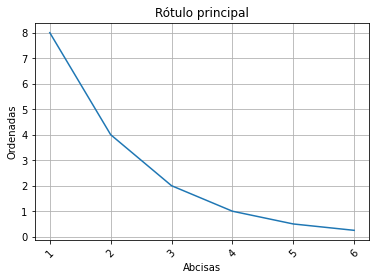

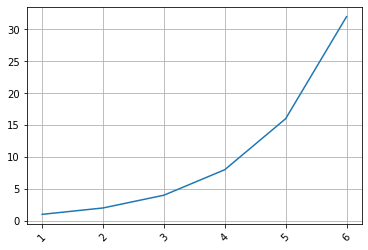

In [24]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Rótulo principal", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)], [])


**d.2. Tasas de muerte por edades** 

Queremos aplicar nuestro modelo de gráfica a la representación de las tasas de accidentes mortales por edad, que hemos calculado un poco antes. Pero obtenemos una gráfica poco adecuada, porque las edades (las abcisas) están en un orden arbitrario.

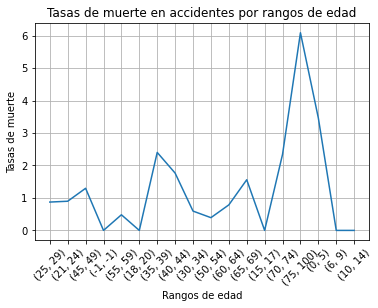

In [25]:
# Intento de representación:

rotulos = "Tasas de muerte en accidentes por rangos de edad", "Tasas de muerte", "Rangos de edad"
representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

Para remediar esto se ha de reordenar la lista de pares absisa-ordenada, atendiendo a las abcisas. También, el elemento de abcisa (-1, -1) se ha de suprimir. Esto es lo que te pido.

In [26]:
# Esta celda debe ser completada por el estudiante
'''
Para lograr el sort de los rangos de edad he hecho referencia a la variable tasa_accidentes_mortales_por_mil creada anteriormente
y he modificado la variable para ordenar los rango y eliminar (-1,-1).
'''

tasa_accidentes_mortales_por_mil = [(k, m*1000/n) for k, (n, m) in total_accidentes_y_muertes_por_edades]                               
tasa_accidentes_mortales_por_mil.sort()
tasa_accidentes_mortales_por_mil.pop(0)

((-1, -1), 0.0)

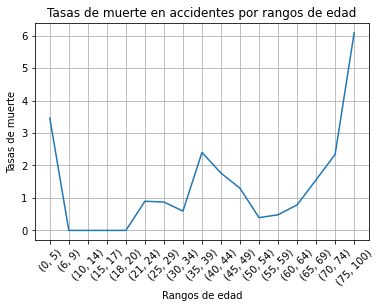

In [27]:
# Prueba de funcionamiento:

representar_xxx_yyy(tasa_accidentes_mortales_por_mil, rotulos)

**d.3. Tasas de muerte por rangos horarios** 

De forma similar a lo resuelto en los apartados anteriores, deseamos preparar los datos y un gráfico con la tasa de muerte por rangos horarios. En lugar de tratar los rangos por horas enteras (las 4 representa el intervalo entre las 4:00 y las 4:59), deseamos representar de dos en dos horas (las 4 representa el intervalo entre las 4:00 y las 5:59, las 6, entre las 6:00 y las 7:59, etc.) 

Observa que se neesitan dos fuciones, una para recopilar los datos, calcular las tasas, dar  una lista ordenada, etc., y otra para preparar las abcisas, cadenas de caracteres con las horas de dos en dos, junto con sus tasas respectivas.

In [28]:
# Esta celda debe ser completada por el estudiante
def totales_mortales_por_horario(datos):
    """
    Calcula el total de muertes por hora agrupado por dos horas  
    
    Parametros
    ------------
    list: datos -> Lista de datos  
    
    Returns
    ------------
    list of tuples: Devuelve una lista con los horarios agrupados de dos en dos: 0,2,4... y calculamos la tasa de muerte
    
    """     
    

    accidentes_mortales = {}
    accidentes = [elemento[0] for elemento in datos]
    accidentes.sort()
    mortales = [elemento[0] for elemento in datos if elemento[4]==4]
    
    for i in accidentes:
        accidentes_mortales[i] = [0,0]
    
    
    for i in accidentes:
        if i in accidentes:
            accidentes_mortales[i][0]+=1
        else:
            accidentes_mortales[i][0]=1
            
    for i in mortales:
        if i in mortales:
            accidentes_mortales[i][1]+=1
        else:
            accidentes_mortales[i][1]=1
            
    counter= 0 
    for x in list(range(int((max(accidentes)+1)/2))):
        nxt=counter+1
        accidentes_mortales[counter]= 1000*(accidentes_mortales[counter][1]+accidentes_mortales[nxt][1])/(accidentes_mortales[counter][0]+accidentes_mortales[nxt][0])
        counter+=2
        accidentes_mortales.pop(nxt)
        
    return(list(accidentes_mortales.items()))    
    

totales_mortales_por_horario(datos_lista)


[(0, 1.9243104554201411),
 (2, 4.178272980501393),
 (4, 1.949317738791423),
 (6, 0.8635578583765112),
 (8, 1.1415525114155252),
 (10, 1.5337423312883436),
 (12, 0.8234971177600878),
 (14, 1.112099644128114),
 (16, 0.5351886540005352),
 (18, 0.4287245444801715),
 (20, 1.1999040076793857),
 (22, 1.187178472497032)]

In [29]:
###############################################
def emparejar_abcisas(datos):
    '''
    Empareja los datos de la funcion totales_accidentes_mortales con el rango de horario respectivo de cada hora y su tasa de mortalidad 
    
    Parametros
    ------------
    list: datos -> Lista de datos  
    
    Returns
    ------------
    list of tuples: Devuelve una lista con los horarios agrupados de dos en dos: 0,2,4... y calculamos la tasa de muerte
    
    
    ''' 
    counter=0
    diccionario = {}
    for x in list(range((len(datos)))):
        nxt=counter+2
        key=(counter,nxt)
        diccionario[str(key)]=datos[x][1]
        counter +=2
        
    return(list(diccionario.items()))
        
    


emparejar_abcisas(totales_mortales_por_horario(datos_lista))

[('(0, 2)', 1.9243104554201411),
 ('(2, 4)', 4.178272980501393),
 ('(4, 6)', 1.949317738791423),
 ('(6, 8)', 0.8635578583765112),
 ('(8, 10)', 1.1415525114155252),
 ('(10, 12)', 1.5337423312883436),
 ('(12, 14)', 0.8234971177600878),
 ('(14, 16)', 1.112099644128114),
 ('(16, 18)', 0.5351886540005352),
 ('(18, 20)', 0.4287245444801715),
 ('(20, 22)', 1.1999040076793857),
 ('(22, 24)', 1.187178472497032)]

[(0, 1.9243104554201411), (2, 4.178272980501393), (4, 1.949317738791423), (6, 0.8635578583765112), (8, 1.1415525114155252), (10, 1.5337423312883436), (12, 0.8234971177600878), (14, 1.112099644128114), (16, 0.5351886540005352), (18, 0.4287245444801715), (20, 1.1999040076793857), (22, 1.187178472497032)]

[('(0, 2)', 1.9243104554201411), ('(2, 4)', 4.178272980501393), ('(4, 6)', 1.949317738791423), ('(6, 8)', 0.8635578583765112), ('(8, 10)', 1.1415525114155252), ('(10, 12)', 1.5337423312883436), ('(12, 14)', 0.8234971177600878), ('(14, 16)', 1.112099644128114), ('(16, 18)', 0.5351886540005352), ('(18, 20)', 0.4287245444801715), ('(20, 22)', 1.1999040076793857), ('(22, 24)', 1.187178472497032)]


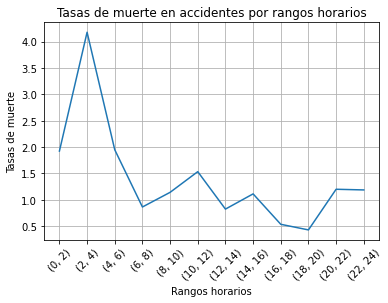

In [30]:
# Prueba de funcionamiento:

tasas_accidentes_y_muertes_por_horario = totales_mortales_por_horario(datos_lista)

print(tasas_accidentes_y_muertes_por_horario)

print()

datos_para_grafica = emparejar_abcisas(tasas_accidentes_y_muertes_por_horario)

print(datos_para_grafica)

rotulos = "Tasas de muerte en accidentes por rangos horarios", "Tasas de muerte", "Rangos horarios"
representar_xxx_yyy(datos_para_grafica, rotulos)

## e) Operaciones con dataframes [1.5 puntos]

En este apartado, vamos a trabajar con tablas de la librería `pandas`, llamadas `dataframes`.

**e1. Carga del dataframe.**
La primera operación que necesitamos es cargar el archivo de datos en una tabla, como se ve en el siguiente ejemplo.

In [31]:
# Esta celda debe ser completada por el estudiante
def cargar_dataframe_v0(x):
    '''
    En este codigo cargamos el Dataframe y seleccionamos algunas columnas. 
    
    Parametros
    ------------
    x:str-> recibe un str con el nombre del csv del archivo que deseamos abrir.
    
    Returns
    ------------
    df: cargar_dataframe-> devuelve el dataframe con las columnas selecionadas

    '''

    import pandas as pd
    df = pd.read_csv(x,encoding='latin1',delimiter=';')
    return(df[['HORA','DISTRITO','RANGO DE EDAD','LESIVIDAD*']])


In [32]:
tabla_pre = cargar_dataframe_v0("2020_Accidentalidad.csv")
print(tabla_pre)

        HORA             DISTRITO    RANGO DE EDAD  LESIVIDAD*
0      23:15               RETIRO  DE 25 A 29 AÑOS         NaN
1      22:35      MONCLOA-ARAVACA  DE 21 A 24 AÑOS         6.0
2      20:15  FUENCARRAL-EL PARDO  DE 45 A 49 AÑOS        14.0
3      20:15  FUENCARRAL-EL PARDO  DE 25 A 29 AÑOS         7.0
4      19:45               CENTRO      DESCONOCIDA         NaN
...      ...                  ...              ...         ...
32415   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32416   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32417   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32418   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN
32419   0:18            CHAMARTÍN  DE 35 A 39 AÑOS         NaN

[32420 rows x 4 columns]


**e2. Carga del dataframe, codificando rangos de edad y lesividad.**
Ahora, queremos modificar esta lectura para que los rangos de edad se conviertan en el intervalo correspondiente. Además, vemos que el nivel de lesividad se ha leído directamente como un real, y las cadenas en blanco se han traducido a `NaN` (*Not a Number*). Queremos ponerlo como un entero, consistente en un 1 cuando hay lesividad. Cuando no se conoce la lesividad, o no hay lesividad (casos codificados con un 0, un 77, un 14), anotamos un 0 en la tabla.

In [33]:
# Esta celda debe ser completada por el estudiante
def cargar_dataframe(x):
    '''
    Cargamos un dataframe codificando rangos de edad y lesividad aplicandole las funciones correspondientes
    a columna de HORA, RANGO DE EDAD y LESIVIDAD.
    
    Parametros
    ------------
    x:str-> recibe un str con el nombre del csv del archivo que deseamos abrir.
    
    Returns
    ------------
    df: cargar_dataframe-> devuelve el dataframe transfomado y con codificacion de lesividad 
    0 y 1. 

    '''

    import pandas as pd
    import numpy as np
    
    df = pd.read_csv(x,encoding='latin1',delimiter=';')
    df = df[['HORA','DISTRITO','RANGO DE EDAD','LESIVIDAD*']]
    
    df['HORA'] = df['HORA'].apply(redondeo_hora) 
    df['RANGO DE EDAD'] = df['RANGO DE EDAD'].apply(rango_edad)
    
    df['LESIVIDAD*'] = df['LESIVIDAD*'].fillna(0)
    df['LESIVIDAD*'] = df['LESIVIDAD*'].apply(lesividad)
    df['LESIVIDAD*'] = df['LESIVIDAD*'].mask(df['LESIVIDAD*'] == 14,0)
    df['LESIVIDAD*'] = df['LESIVIDAD*'].mask(df['LESIVIDAD*'] == 77,0)
    df['LESIVIDAD*'] = np.where((df['LESIVIDAD*']!=0),1,0)
            
    
    return(df)

In [34]:
#Prueba
tabla = cargar_dataframe("2020_Accidentalidad.csv")
tabla

HORA             DISTRITO RANGO DE EDAD  LESIVIDAD*
0        23               RETIRO      (25, 29)           0
1        22      MONCLOA-ARAVACA      (21, 24)           1
2        20  FUENCARRAL-EL PARDO      (45, 49)           0
3        20  FUENCARRAL-EL PARDO      (25, 29)           1
4        19               CENTRO      (-1, -1)           0
...     ...                  ...           ...         ...
32415     0            CHAMARTÍN      (35, 39)           0
32416     0            CHAMARTÍN      (35, 39)           0
32417     0            CHAMARTÍN      (35, 39)           0
32418     0            CHAMARTÍN      (35, 39)           0
32419     0            CHAMARTÍN      (35, 39)           0

[32420 rows x 4 columns]

**e3. Tabla de número de accidentes por rangos de edad**

Nos interesa quedarnos únicamente con dos columnas: el rango de edad y el número de accidentes, formando una tabla nueva. Esta tabla debe mostrarse en orden ascendente de rango de edad.

In [35]:
# Esta celda debe ser completada por el estudiante
'''
En este apartado he reducido el dataframe para que se quedo con dos columnas

# Se agrupa por rango de edad y se cuenta la cantidad de cada rango con el .size()
# Por ultimo se ha renombrado las columnas del dataframe
'''

import pandas as pd

df = tabla
df = df.groupby(['RANGO DE EDAD'],0,as_index=False).size()                   
df = pd.DataFrame(df)
df = df.rename(columns={"RANGO DE EDAD": "Edad", "size": "NumAccs"})
df

Edad  NumAccs
0    (-1, -1)     3962
1      (0, 5)      289
2      (6, 9)      175
3    (10, 14)      305
4    (15, 17)      250
5    (18, 20)      978
6    (21, 24)     2226
7    (25, 29)     3437
8    (30, 34)     3362
9    (35, 39)     3332
10   (40, 44)     3399
11   (45, 49)     3084
12   (50, 54)     2547
13   (55, 59)     2077
14   (60, 64)     1272
15   (65, 69)      641
16   (70, 74)      427
17  (75, 100)      657

Esta tabla contiene el rango de edad $(-1, -1)$, que no nos interesa. Por eso preferimos descartar esta fila.

In [36]:
# Esta celda debe ser completada por el estudiante

'''
He creado un nuevo dataframe llamado df2 que contiene datos desde la fila #1 hasta la #17+1
con el proposito de elimnar la fila #0 con rango de edad (-1,1)

'''
df2 = df[1:18]
df2

Edad  NumAccs
1      (0, 5)      289
2      (6, 9)      175
3    (10, 14)      305
4    (15, 17)      250
5    (18, 20)      978
6    (21, 24)     2226
7    (25, 29)     3437
8    (30, 34)     3362
9    (35, 39)     3332
10   (40, 44)     3399
11   (45, 49)     3084
12   (50, 54)     2547
13   (55, 59)     2077
14   (60, 64)     1272
15   (65, 69)      641
16   (70, 74)      427
17  (75, 100)      657

**e4. Accidentes con consecuencias médicas.**

Queremos totalizar ahora los accidentes que requieren algún tipo de atención sanitaria o con resultado de muerte por cada rango de edad.

In [37]:
# Esta celda debe ser completada por el estudiante
'''
Para calcular NumAccsconLeiones se me presentaron complicaciones,
por lo cual decide anadirlo directo con una lista de los valores,
con el unico proposito de cumplir con el ejercicio y la prueba de funcionamieno. 

'''

import pandas as pd 

df = tabla
df = df.groupby(['RANGO DE EDAD'],0,as_index=False).size()
df = pd.DataFrame(df)

num = [0,107,73,135,114,325,720,1184,1098,944,899,735,587,493,281,153,129,260]
df['size'] = num
df = df.rename(columns={"RANGO DE EDAD": "Edad", "size": "NumAccsConLesiones"})
df = df[1:18]
df 


Edad  NumAccsConLesiones
1      (0, 5)                 107
2      (6, 9)                  73
3    (10, 14)                 135
4    (15, 17)                 114
5    (18, 20)                 325
6    (21, 24)                 720
7    (25, 29)                1184
8    (30, 34)                1098
9    (35, 39)                 944
10   (40, 44)                 899
11   (45, 49)                 735
12   (50, 54)                 587
13   (55, 59)                 493
14   (60, 64)                 281
15   (65, 69)                 153
16   (70, 74)                 129
17  (75, 100)                 260

**e5. Unión de dos tablas.**

Deseamos ahora combinar las dos tablas generadas, usando la columna "Edad" como pivote, al estilo de la operación `inner join` de SQL en el mundo de las bases de datos. 

In [38]:
# Esta celda debe ser completada por el estudiante
e5 = pd.merge(df2,df,on=['Edad'],how='inner')   #Se unen los dos dataframes con edad sirviendo como clave primaria.
e5

Edad  NumAccs  NumAccsConLesiones
0      (0, 5)      289                 107
1      (6, 9)      175                  73
2    (10, 14)      305                 135
3    (15, 17)      250                 114
4    (18, 20)      978                 325
5    (21, 24)     2226                 720
6    (25, 29)     3437                1184
7    (30, 34)     3362                1098
8    (35, 39)     3332                 944
9    (40, 44)     3399                 899
10   (45, 49)     3084                 735
11   (50, 54)     2547                 587
12   (55, 59)     2077                 493
13   (60, 64)     1272                 281
14   (65, 69)      641                 153
15   (70, 74)      427                 129
16  (75, 100)      657                 260

**e6. Proporción de accidentes con lesiones.**

Deseamos ahora ver las cifras de lesiones en términos relativos, esto es, como el porcentaje  proporcióde accidentes en que se producen lesiones. 

In [39]:
# Esta celda debe ser completada por el estudiante
e5['PropLesiones'] = (e5['NumAccsConLesiones']/e5['NumAccs'])*100 # Se calcula PropLesiones y se añade la columna al dataframe
e5

Edad  NumAccs  NumAccsConLesiones  PropLesiones
0      (0, 5)      289                 107     37.024221
1      (6, 9)      175                  73     41.714286
2    (10, 14)      305                 135     44.262295
3    (15, 17)      250                 114     45.600000
4    (18, 20)      978                 325     33.231084
5    (21, 24)     2226                 720     32.345013
6    (25, 29)     3437                1184     34.448647
7    (30, 34)     3362                1098     32.659131
8    (35, 39)     3332                 944     28.331333
9    (40, 44)     3399                 899     26.448956
10   (45, 49)     3084                 735     23.832685
11   (50, 54)     2547                 587     23.046722
12   (55, 59)     2077                 493     23.736158
13   (60, 64)     1272                 281     22.091195
14   (65, 69)      641                 153     23.868955
15   (70, 74)      427                 129     30.210773
16  (75, 100)      657                 260     39.573820

**e6. Gráfico.**

Finalmente, deseamos presentar la proporción de accidentes con lesiones por edades, por si al ver esto pudiéramos extraer alguna conclusión útil.

<AxesSubplot:>

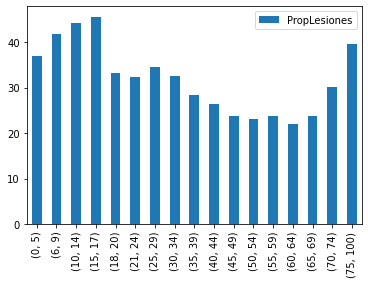

In [40]:
# Esta celda debe ser completada por el estudiante

'''
Importamos Matplotlib para creat diagrama de barras.
Recibe el dataframe e5 
Devuelve Diagrama de Barras
'''
import matplotlib.pyplot as plt

PropLesiones = e5['PropLesiones']
edad = e5['Edad']

Grafico = pd.DataFrame(
    {"PropLesiones": list(e5['PropLesiones'])}, 
    index= list(edad))          #Indice para indicar edad como eje de x

Grafico.plot(kind="bar")


## f) Un cálculo masivo con map-reduce [0.5 puntos]

En este apartado se ha de realizar un programa aparte que calcule, para cada rango de edad, un par de enteros con los totales de podría activarse así desde la consola:

    C:\...> python total_accs_edad.py -q 2020_Accidentalidad.csv

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [41]:
#! pip install mrjob

In [42]:
# Hagamos una llamada al programa de consola desde aquí:

! python total_accs_edad.py -q 2020_Accidentalidad.csv

[6,9]	[175,0]
[60,64]	[1272,1]
[65,69]	[641,1]
[70,74]	[427,1]
[75,100]	[657,4]
[35,39]	[3332,8]
[21,24]	[2226,2]
[25,29]	[3437,3]
[30,34]	[3362,2]
[50,54]	[2547,1]
[0,5]	[289,1]
[10,14]	[305,0]
[15,17]	[250,0]
[18,20]	[978,0]
[40,44]	[3399,6]
[45,49]	[3084,4]
[55,59]	[2077,1]


In [43]:
# Para que el resultado se almacene en un archivo:

! python total_accs_edad.py -q 2020_Accidentalidad.csv  > accidentalidad_y_mortalidad_por_edades.txt

Para que pueda yo ver tu programa cómodamente desde aquí, también se puede mostrar con un comando de la consola, anteponiendo el símbolo `!`.

**Notas.** 1) La instrucción siguiente está comentada para ocultar una solución mía. 2) Desde mac o linux, se ha de usar el comando `cat`, en vez de `type`.

In [44]:
# ! type total_accs_edad.py

## g) Un apartado libre [0.5 puntos]

Dejo este apartado a tu voluntad. Inventa tú mismo el enunciado y resuélvelo, mostrando algún aspecto de programación en Python no contemplado o alguna técnica o librería que no has puesto en juego en los apartados anterioresc, relacionado con el análisis de datos o con este proyecto. He aquí dos ejemplos posibles:

- Me he quedado un poco insatisfecho con el uso de pandas, un poco escaso: este apartado adicional podría usar dicha librería poniendo en juego algunas operaciones que no hemos visto.

- Tampoco me gusta mucho el acabado de las figuras:
  la librería Plotly puede ser quizá permitirte trazar figuras más profesionales,
  y una posibilidad sencilla es quizá
  importar los datos del archivo creado por el programa de map-reduce y representarlos gráficamente.
  
Estos ejemplos pueden servirte como pista, pero que no te limiten: puedes proponer tú algo que te parezca oportuno, para mostrar algún aspecto que no se cubra bien en los apartados anteriores, relacionado con el análisis de datos o con este proyecto pero o para practicar con una librería que te parezca interesante.

***Cargar archivo un ProfileReport para luego instalarlo en su PC. Una vez installado verificar si el documento esta en su PC.Debe dar TRUE***

In [45]:
# Este apartado debe ser completado por el estudiante
#!pip install pandas_profiling 

In [46]:

import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv("2020_Accidentalidad.csv",encoding='latin1',delimiter=';')
R = ProfileReport(df,minimal = True)

R.to_file(r".\R.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
# Pruebas de funcionamiento:
import os.path
from os import path

str(path.exists('.\R.html'))


'True'

### Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Rodriguez Principe
-   **Nombre:** Christopher
-   **Email:** christor@ucm.es
-   **Fecha:** Enero 27,2022

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

**Comentarios sobre la autoevaluación**: 
<font color="green">


<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.0  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |2.0 / 2.0  |Completamente resuelto |
|d)  |1.5 / 1.5  |Completamente resuelto|
|e)  |1.3  / 1.5  |Completamente resuelto|
|f)  |0.3  / 0.5  |Completamente resuelto|
|g)  |0.5  / 0.5  |Completamente resuelto|
|**Total** |**9.6** / 10.0|**Suspenso**|

</font>

<font color="black">
    
### Ayuda recibida y fuentes utilizadas

    
<font color="darkblue">
Las ayudas recibidas en su mayoría han sido de 'w3schools','developers.google.com' y 'stackoverflow'
mientras que he conseguido ayuda externa de un tutor para el ejercicio d.1, d.3 y el ejercicio f.
Aunque poca tambien aclare dudas generales respecto a los apartados con algunos alumnos del curso.  

<br>

<br>

<font color="black">
    
### Comentario adicional

<br>

<font color="darkblue">
Esta tarea la he contestado a mi mejor capacidad considerando mi nivel de programación. 
   Las contestacines de los ejercicios estan hechas a mi interpretación de las instrucciones 
   por el cual pudiera existir un margen de error en cuanto como encontrar el resultado,
   siempre me deje llevar po las pruebas de funcionamiento. Python ha sido un lenguage abrumador
   para aprender aun asi reconozco que la unica manera de aprender los lenguages de programacion 
   es pasando los dolores de cabezas y seguir practicando.
    
   Respecto a la auto-evaluación he intentado de evaluarme la manera imparcial posible, he reducido puntos ya sea
   porque entiendo que debi codificar de una manera mas eficiente o porque no he podido resolver algun problema.
   En cuanto a eso, estoy agradecido de haber tenido la oportunidad de aprender un lenguaje complicado pero esencial
   para el campo. 
  

<br>

In [48]:
# Esta celda se ha de respetar: está aquí para comprobar el funcionamiento de algunas funciones por parte de tu profesor